<a href="https://colab.research.google.com/github/satishchaudhary382/satish/blob/master/Portfolio%20optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
#df = pd.read_excel("/content/Book2.xlsx", parse_dates=['Date'])

In [0]:
xl =pd.ExcelFile('/content/STOCK.xlsx')

data = {}
for sheet in xl.sheet_names:
  data[f'{sheet}'] =pd.read_excel(xl, sheet_name=sheet, parse_date = ['Date'])

df = pd.DataFrame()
df['Date'] = pd.date_range("2019-01-01", "2020-3-22")

temp_df= pd.DataFrame()
for stock, value in data.items():
  temp_df['Date'] = value['Date']
  temp_df['Close'] = value['Close']
  df = pd.merge(df, temp_df,on = 'Date', how = 'outer')

df.set_index("Date", inplace = True)

df.columns = ['NABIL','HBL','LBL','CTZ','NIB','CBL','ADBL','SBI','NIC','EBL','LIC','NECO']

df = df.fillna(method='bfill')

In [0]:
df.dropna(inplace = True)

In [5]:
df

,NABIL,HBL,LBL,CTZ,NIB,CBL,ADBL,SBI,NIC,EBL,LIC,NECO
Date,,,,,,,,,,,,
2019-01-01,850.0,476.0,221.0,213.0,552.0,165.0,345.0,394.0,382.0,540.0,1655.0,547.0
2019-01-02,850.0,476.0,221.0,213.0,552.0,165.0,345.0,394.0,382.0,540.0,1655.0,547.0
2019-01-03,841.0,474.0,220.0,212.0,550.0,162.0,345.0,391.0,383.0,535.0,1670.0,545.0
2019-01-04,837.0,472.0,217.0,210.0,548.0,162.0,344.0,389.0,377.0,532.0,1642.0,532.0
2019-01-05,837.0,472.0,217.0,210.0,548.0,162.0,344.0,389.0,377.0,532.0,1642.0,532.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-15,750.0,549.0,213.0,190.0,388.0,140.0,382.0,419.0,518.0,652.0,1281.0,516.0
2020-03-16,750.0,548.0,214.0,191.0,387.0,141.0,382.0,423.0,522.0,656.0,1300.0,521.0
2020-03-17,731.0,525.0,209.0,186.0,380.0,138.0,378.0,412.0,508.0,640.0,1202.0,482.0


In [0]:
#df.set_index("Date", inplace = True)

In [0]:
rets = df.pct_change()

In [8]:
rets.mean()*238*100

NABIL    -5.272450
HBL       7.594499
LBL      -0.579047
CTZ      -5.714853
NIB     -18.400662
CBL      -6.797266
ADBL      7.414182
SBI       6.997644
NIC      18.310378
EBL      11.228060
LIC     -11.582078
NECO     -1.510013
dtype: float64

In [9]:
rets.cov()*238

,NABIL,HBL,LBL,CTZ,NIB,CBL,ADBL,SBI,NIC,EBL,LIC,NECO
NABIL,0.056797,0.030049,0.025393,0.021377,0.023485,0.016647,0.024796,0.039208,0.030517,0.040765,0.026769,0.029243
HBL,0.030049,0.057488,0.025993,0.022772,0.021419,0.020055,0.023045,0.039274,0.033691,0.037790,0.020948,0.018830
LBL,0.025393,0.025993,0.053249,0.021444,0.021267,0.025614,0.024078,0.035691,0.031019,0.033075,0.020600,0.024988
CTZ,0.021377,0.022772,0.021444,0.037130,0.015550,0.016759,0.022799,0.031390,0.027434,0.027022,0.019297,0.022640
NIB,0.023485,0.021419,0.021267,0.015550,0.035542,0.015663,0.021188,0.028912,0.024102,0.029658,0.020607,0.023740
CBL,0.016647,0.020055,0.025614,0.016759,0.015663,0.040783,0.017821,0.026350,0.024093,0.024940,0.018070,0.021652
ADBL,0.024796,0.023045,0.024078,0.022799,0.021188,0.017821,0.055411,0.031325,0.028348,0.028501,0.024786,0.027589
SBI,0.039208,0.039274,0.035691,0.031390,0.028912,0.026350,0.031325,0.072025,0.040309,0.048903,0.031186,0.036030
NIC,0.030517,0.033691,0.031019,0.027434,0.024102,0.024093,0.028348,0.040309,0.057399,0.041639,0.028723,0.031247
EBL,0.040765,0.037790,0.033075,0.027022,0.029658,0.024940,0.028501,0.048903,0.041639,0.059230,0.032625,0.033016


In [10]:
weights  = np.random.random(len(df.columns))
weights /= np.sum(weights)
weights

array([0.11861633, 0.00610653, 0.13858276, 0.00072889, 0.17601345,
       0.01759769, 0.17557718, 0.04666318, 0.11271428, 0.01988619,
       0.15369565, 0.03381787])

In [11]:
np.sum(weights)

1.0

In [12]:
exp = np.sum(rets.mean()*weights)*238
exp

-0.019375766375653556

In [13]:
var = np.dot(weights.T, np.dot(rets.cov()*238, weights))
sd = np.sqrt(var)
sd

0.1767272918769306

In [0]:
prets = []
pvol = []
for p in range(25000):
  weights = np.random.random(len(df.columns))
  weights /= np.sum(weights)
  prets.append(np.sum(rets.mean()*weights*238))
  pvol.append(np.sqrt(np.dot(weights.T, 
                             np.dot(rets.cov()*238, weights))))

In [0]:
prets = np.array(prets)
pvols = np.array(pvol)


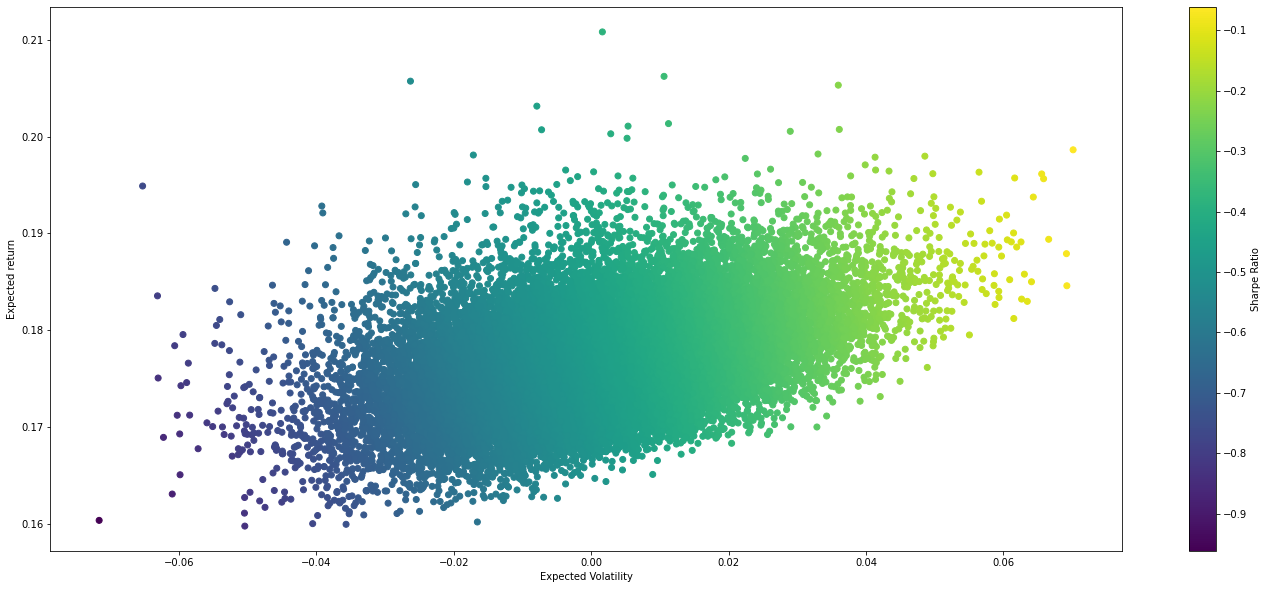

In [16]:
plt.figure(figsize = (24,10))
plt.scatter(prets, pvols, c = (prets-0.0825)/pvols, marker = 'o')
plt.xlabel("Expected Volatility")
plt.ylabel("Expected return")
plt.colorbar(label = "Sharpe Ratio")

In [0]:
def statistics(weights):
  weights = np.array(weights)
  pret = np.sum(rets.mean()*weights)*238
  pvol = np.sqrt(np.dot(weights.T, np.dot(rets.cov()*238, weights)))
  return np.array([pret, pvol, pret/pvol])

In [18]:
statistics([.1,.1,.1,.1,.1,.1,.1,.1,.25,.25,.25,.25])

array([0.02635792, 0.33448937, 0.07880046])

In [0]:
import scipy.optimize as sco
def min_func_sharpe(weights):
  return -statistics(weights)[2]

cons = ({'type':"eq", "fun":lambda x: np.sum(x)-1})
bnds = tuple((0,1) for x in range(len(df.columns)))
initial = len(df.columns)*[1/len(df.columns)]


In [20]:
%%time
opts = sco.minimize(min_func_sharpe, initial, method = "SLSQP", bounds = bnds, constraints=cons)

CPU times: user 84.4 ms, sys: 5 µs, total: 84.4 ms
Wall time: 85.2 ms


In [21]:
opts

     fun: -0.7642659454353302
     jac: array([0.6264004 , 0.13160737, 0.43718074, 0.60381556, 1.08894543,
       0.60451102, 0.06798265, 0.24463366, 0.        , 0.0857681 ,
       0.86586849, 0.4790791 ])
 message: 'Optimization terminated successfully.'
    nfev: 56
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([1.12733390e-16, 0.00000000e+00, 7.42278416e-17, 0.00000000e+00,
       5.91014752e-17, 1.78257256e-16, 2.65077996e-17, 0.00000000e+00,
       1.00000000e+00, 1.38777878e-16, 9.39504785e-17, 0.00000000e+00])

In [22]:
opts['x'].round(3)

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [23]:
statistics(opts['x']).round(2)

array([0.18, 0.24, 0.76])

In [0]:
def min_func_variance(weights):
  return statistics(weights)[1]**2

In [0]:
optv = sco.minimize(min_func_variance, initial, method = "SLSQP", bounds = bnds, constraints= cons)

In [26]:
optv['x'].round(2)

array([0.04, 0.03, 0.  , 0.27, 0.31, 0.26, 0.05, 0.  , 0.  , 0.  , 0.03,
       0.  ])

In [27]:
statistics(optv['x']).round(2)

array([-0.09,  0.15, -0.6 ])

In [0]:
cons = ({'type':'eq', "fun":lambda x : statistics(x)[0]-tret},
        {"type":"eq", 'fun': lambda x: np.sum(x)-1})
bnds = tuple((0,1) for x in weights)

In [0]:
def min_func_port(weights):
  return statistics(weights)[1]

trets = np.linspace(0,.10,20)
tvols = []
for tret in trets:
  cons = ({'type':'eq', "fun":lambda x : statistics(x)[0]-tret},
        {"type":"eq", 'fun': lambda x: np.sum(x)-1})
  res = sco.minimize(min_func_port, initial, method = "SLSQP", bounds = bnds, constraints= cons)
  tvols.append(res['fun'])
tvols = np.array(tvols)

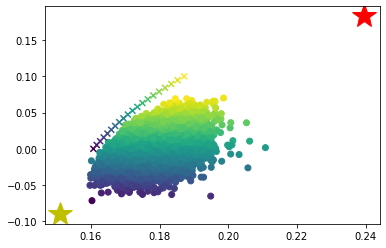

In [30]:
plt.scatter(pvols, prets, c = prets/pvols, marker = 'o')
plt.scatter(tvols,trets, c =trets/tvols, marker = "x")
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0], "r*", markersize = 25)
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0], "y*", markersize = 25)